<a href="https://colab.research.google.com/github/yashyaks/compute_tasks/blob/main/Lab_2/Lab2.3_DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/yashyaks/compute_tasks/main/Lab_2/Breast_cancer_data.csv")

In [3]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [4]:
print(df.columns)

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')


In [5]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

diagnosis
1    357
0    212
dtype: int64


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

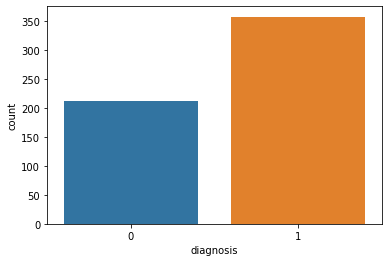

In [6]:
x = df.value_counts("diagnosis")
print(x)
sns.countplot(x=df["diagnosis"])

<AxesSubplot:>

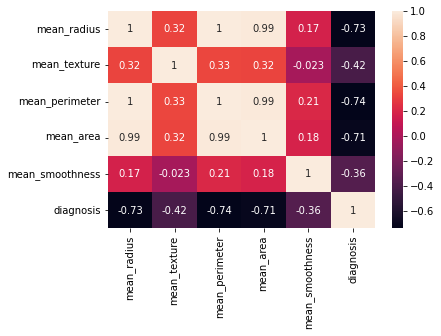

In [7]:
corr = df.corr()
sns.heatmap(corr, annot=True)

In [8]:
df_features = df.iloc[:,:-1]
df_target = df.iloc[:,-1]
print("feature_columns")
print(df_features.head())
print("target_column")
print(df_target.head())

feature_columns
   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness
0        17.99         10.38          122.80     1001.0          0.11840
1        20.57         17.77          132.90     1326.0          0.08474
2        19.69         21.25          130.00     1203.0          0.10960
3        11.42         20.38           77.58      386.1          0.14250
4        20.29         14.34          135.10     1297.0          0.10030
target_column
0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64


In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.25,random_state = 101)

In [10]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [11]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

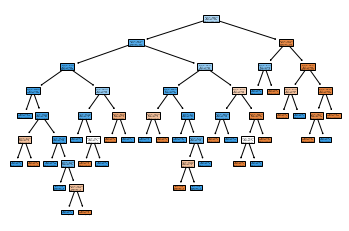

In [12]:
from sklearn import tree
import matplotlib.pyplot as plt

tree.plot_tree(classifier,filled = True)
plt.show()

In [13]:
#Predict the response for test dataset
y_pred_test = classifier.predict(x_test)

In [14]:
from sklearn import metrics

score = metrics.accuracy_score(y_pred_test,y_test)
print(score)

0.8741258741258742


In [15]:
from sklearn import metrics

c_matrix_test = metrics.confusion_matrix(y_test, y_pred_test)

print(c_matrix_test)

[[47  8]
 [10 78]]


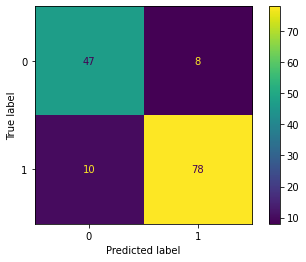

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix_test)
disp.plot()

In [21]:
test_acc_li=[]
for i in range(1,21):
  classifier_plot = DecisionTreeClassifier(max_depth=i)
  classifier_plot.fit(x_train,y_train)
  y_pred_test_plot = classifier_plot.predict(x_test)
  test_score_plot = metrics.accuracy_score(y_pred_test_plot,y_test)
  test_acc_li.append(test_score_plot)
print(test_acc_li)

[0.8881118881118881, 0.8741258741258742, 0.8601398601398601, 0.8951048951048951, 0.8741258741258742, 0.8671328671328671, 0.8671328671328671, 0.8671328671328671, 0.8811188811188811, 0.8671328671328671, 0.8741258741258742, 0.8811188811188811, 0.8811188811188811, 0.8671328671328671, 0.8811188811188811, 0.8741258741258742, 0.8811188811188811, 0.8741258741258742, 0.8811188811188811, 0.8811188811188811]


In [18]:
train_acc_li=[]
for i in range(1,21):
  classifier_plot = DecisionTreeClassifier(max_depth=i)
  classifier_plot.fit(x_train,y_train)
  y_pred_train_plot = classifier_plot.predict(x_train)
  train_score_plot = metrics.accuracy_score(y_pred_train_plot,y_train)
  train_acc_li.append(train_score_plot)
print(train_acc_li)

[0.8967136150234741, 0.9061032863849765, 0.931924882629108, 0.9694835680751174, 0.9835680751173709, 0.9929577464788732, 0.9976525821596244, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


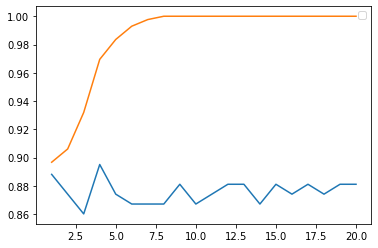

In [22]:
import numpy as np

x = np.arange(1, 21)

plt.plot(x,test_acc_li)
plt.plot(x,train_acc_li)
plt.legend()

plt.show()

In [24]:
n=int(input("Enter max depth value:"))

Enter max depth value:1


In [25]:
clf=DecisionTreeClassifier(max_depth=n,random_state=0)

In [26]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=1, random_state=0)

In [28]:
y_train_pred=clf.predict(x_train)

In [29]:
y_test_pred=clf.predict(x_test)

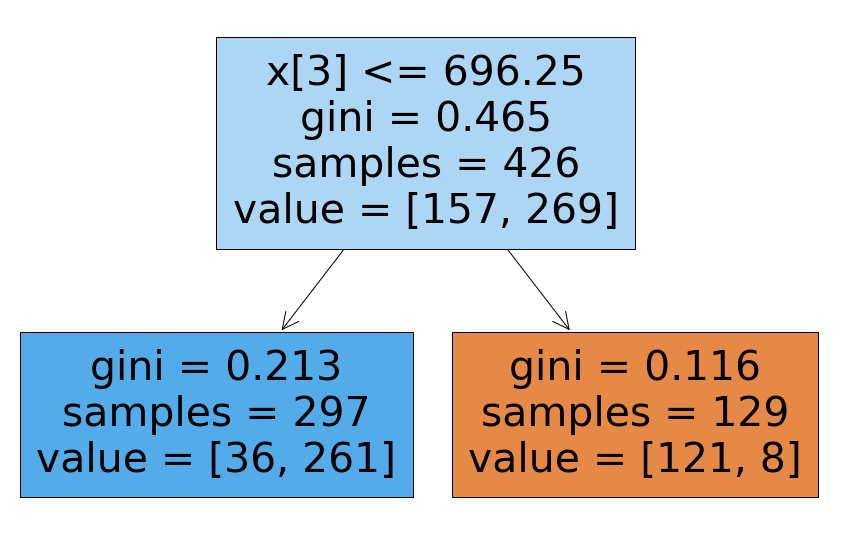

In [31]:
from sklearn import tree
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf, filled=True)

In [36]:
from sklearn import metrics
print(f"training score = {metrics.accuracy_score(y_train,y_train_pred)}")

training score = 0.8967136150234741


In [37]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_train,y_train_pred,labels=clf.classes_)

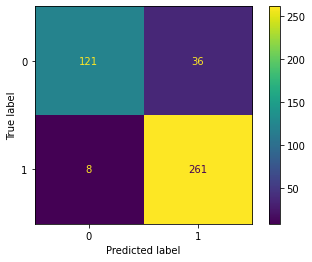

In [39]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()     

In [40]:
print(f"testing score = {metrics.accuracy_score(y_test,y_test_pred)}")

testing score = 0.8881118881118881


In [46]:
cm=metrics.confusion_matrix(y_test,y_test_pred,labels=clf.classes_)

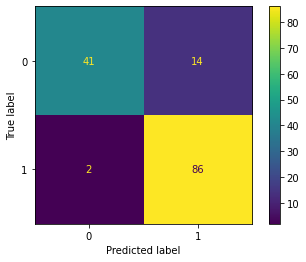

In [49]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [50]:
print(metrics.classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84        43
           1       0.98      0.86      0.91       100

    accuracy                           0.89       143
   macro avg       0.86      0.91      0.88       143
weighted avg       0.91      0.89      0.89       143

